# Lecture 30

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UTA-DataScience/DATA1401.2020.Fall/blob/master/Lectures/Lecture.30/Lecture.30.ipynb)

From previous lecture:

In [3]:
# Import libraries we will use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict

We have an updated CSV file (with Lab 4 grades)... lets load up this new file. First drop the first line as we did last time:

In [4]:
!wc -l Data-1401-Grades.csv

     230 Data-1401-Grades.csv


In [5]:
!tail -230 Data-1401-Grades.csv





Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ","ex1 - cannot not use numpy function(-4)
ex2a - mean function is wrong, values  calculated are wrong(-5)
ex2b - variance function is wrong, values calculated are wrong(-5)
ex3 - cannot use numpy function (-5)
ex4 - function does not draw histogram, goes into infinite loop (-6)
ex5 - should return a list of indices greater than 0.5(-2)
ex6 - does not return length of F1, F2, (-2)
ex7 - not attempted (lambda part) -7.5
ex7 -  cannot use numpy function (-4)
ex8 - UnboundlocalError (

In [6]:
!tail -230 Data-1401-Grades.csv > Data-1401-Grades-Fixed.csv

In [7]:
# Read Data into a Pandas DataFrame
df = pd.read_csv("Data-1401-Grades-Fixed.csv")

In [8]:
# Create mask to keep only lines with numbers
mask=list()
for i in range(16):
    mask.append(True)
    mask.append(False)

In [9]:
# Apply mask and remove NaNs
df_0=df[mask].fillna(0)

In [10]:
# Fix Exam 1 entries
df_0["Exam 1 Fixed"] = list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))

In [11]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,100,96,46,52.5,68-sent,0.0,0.0,0.0,0.0,68
4,100,100,90,56.5,88-sent,0.0,0.0,0.0,0.0,88
6,93,100,24,53,96-sent,0.0,0.0,0.0,0.0,96
8,0,81,0,0,43-sent,0.0,0.0,0.0,0.0,43
10,95,100,105,88,96-sent,0.0,0.0,0.0,0.0,96
12,100,98,87,98,89-sent,0.0,0.0,0.0,0.0,89
14,95,98,50,56.5,52,0.0,0.0,0.0,0.0,52
16,95,96,98,94.5,100-sent,0.0,0.0,0.0,0.0,100
18,0,78,37,47,67,0.0,0.0,0.0,0.0,67


In [12]:
grade_def = [("A+",100),
             ("A",90),
             ("B",80), 
             ("C",70),
             ("D",60),
             ("F",0) ]

grades=OrderedDict(grade_def[::-1])

grades_inverse=OrderedDict(zip(list(grades.values())[::-1],
                               list(grades.keys())[::-1]))

In [13]:
def grade_summary(df_0,grades,min_grade=0.):
    df=df_0[df_0>min_grade]
    N_total=sum(df>min_grade)
    hist,bins=np.histogram(df,bins=list(grades.values()))

    print("Mean:",np.mean(df))
    print("Std:",np.std(df))
    
    for grade_letter,bin_count in zip(grades.keys(),hist):
        print(grade_letter+": "+str(bin_count),
              float(bin_count/N_total) )
    

In [14]:
grade_summary(df_0["Exam 1 Fixed"],grades,55)

Mean: 82.66666666666667
Std: 14.642024753731599
F: 0 0.0
D: 5 0.4166666666666667
C: 0 0.0
B: 2 0.16666666666666666
A: 5 0.4166666666666667


In [15]:
def compute_curve(df_0, min_grade=None):

    if min_grade:
        pass
    else:
        min_grade=np.max(df_0)/2.
    
    print("Min grade:",min_grade)

    df=df_0[df_0>min_grade]
    N_total=sum(df_0>min_grade)
    
    print("N Total (post cut):",N_total)
    print("N Total (pre cut):",df_0.shape)
    
    mean=np.mean(df)
    std=np.std(df)

    print("Mean:",mean)
    print("Std:",std)
    
    grade_def=[("A+",np.max(df)),
               ("A", min(np.max(df),mean+std)),
               ("B",mean), 
               ("C",mean-std),
               ("D",mean-2*std),
               ("F",0.)]
    
    grade_def.reverse()
    grades=OrderedDict( grade_def )
    
    
    hist,bins=np.histogram(df,bins=list(grades.values()))
    
    _=plt.hist(df)
    plt.show()
    
    for grade_letter,bin_count,min_grade in zip(grades.keys(),hist,grades.values()):
        print("{:2.2f}".format(min_grade),
              grade_letter+": "+str(bin_count),
              "{:2.2f}%".format(100.*float(bin_count/N_total)) )
    return grades
    

Min grade: 55
N Total (post cut): 12
N Total (pre cut): (16,)
Mean: 82.66666666666667
Std: 14.642024753731599


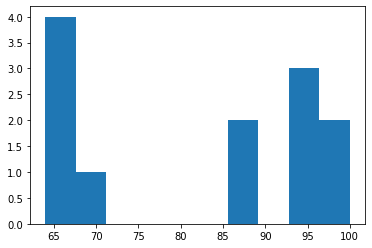

0.00 F: 0 0.00%
53.38 D: 5 41.67%
68.02 C: 0 0.00%
82.67 B: 5 41.67%
97.31 A: 2 16.67%


OrderedDict([('F', 0.0),
             ('D', 53.38261715920348),
             ('C', 68.02464191293507),
             ('B', 82.66666666666667),
             ('A', 97.30869142039828),
             ('A+', 100)])

In [16]:
compute_curve(df_0["Exam 1 Fixed"],55)

In [ ]:
grade_max = 400
grade_def = [("A+",grade_max),
             ("A",.9*grade_max),
             ("B",.8*grade_max), 
             ("C",.7*grade_max),
             ("D",.6*grade_max),
             ("F",0) ]

grades=OrderedDict(grade_def[::-1])

grades_inverse=OrderedDict(zip(list(grades.values())[::-1],
                               list(grades.keys())[::-1]))



## Grading Strategies

Thinking about what we did, we noticed that we have 2 grading strategies:
1. "Standard": 70, 80, 90 scheme.
2. "Curved": Using mean and standard deviation.

There is a third strategy that I often apply when the grade distribution doesn't look like a normal distribution. When we curve the letter grades mean the following, based on the fact that 68% of normal distribution lies between -1 and 1 $\sigma$ of the mean.
|
* B and C: comprise of the 68% of the students withing 1 $\sigma$ of the mean, with the top 34% subset assigned a B and the bottom 34% assigned a C. Nearly all of the remaining 32% of the students will be within 2 $\sigma$ of the mean.
* A: The approximately 16% that are more than 1 $\sigma$ above the mean are assigned an A.
* D: The approximately 16% that are more are between 1 $\sigma$ and 2 $\sigma$ below the mean are assigned a D.

All of this assume a normal distribution. If the grade distribution isn't normal, we can still assign grades in a way that we could interpret in the same way as the curved grades by simply assigning the top 16% an A, next 32% B, then assign C to the 32% and D to the the 16% after.




# Disecting the Task at Hand

We can also note that all the strategies are defined by the boundries between letter grades. Therefore we can factorize the operation of assigning a letter grade into several steps:
* Perform statistical analysis of the grades to obtain basic parameters.
    * Minimum cut-off
    * Mean / Sigma
* Establish grade boundries.
    * Potentially apply several strategies.
    * Select a strategy appropriate for given distribution of grades.
* Use grade boundries to assign grades.
* Validate the assigned grades.



## Quiz

Work out the total Lab grade by:

1. Summing the lab grades: extract the lab grade values, sum them, and add the sum as new column to the DataFrame. 
2. Histogram the lab grades.
3. Apply the curve. Does it give a non-punative bell-curve letter grade distribution (i.e. not worse than non-curved standard scheme)?
4. Determine good grade boundries for the labs.

In [17]:
# Work here... add cells as needed.
lab_grades=list()
for lab_name in ['Lab '+str(i) for i in range(1,5)]:
    lab_grades.append(list(map(float,df_0[lab_name].tolist())))


In [18]:
import numpy as np
df_0["lab sum"]=np.sum(lab_grades,axis=0).tolist()

In [19]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed,lab sum
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0
2,100,96,46,52.5,68-sent,0.0,0.0,0.0,0.0,68,294.5
4,100,100,90,56.5,88-sent,0.0,0.0,0.0,0.0,88,346.5
6,93,100,24,53,96-sent,0.0,0.0,0.0,0.0,96,270.0
8,0,81,0,0,43-sent,0.0,0.0,0.0,0.0,43,81.0
10,95,100,105,88,96-sent,0.0,0.0,0.0,0.0,96,388.0
12,100,98,87,98,89-sent,0.0,0.0,0.0,0.0,89,383.0
14,95,98,50,56.5,52,0.0,0.0,0.0,0.0,52,299.5
16,95,96,98,94.5,100-sent,0.0,0.0,0.0,0.0,100,383.5
18,0,78,37,47,67,0.0,0.0,0.0,0.0,67,162.0


(array([1., 1., 1., 0., 2., 0., 2., 3., 2., 4.]),
 array([  0. ,  38.8,  77.6, 116.4, 155.2, 194. , 232.8, 271.6, 310.4,
        349.2, 388. ]),
 <a list of 10 Patch objects>)

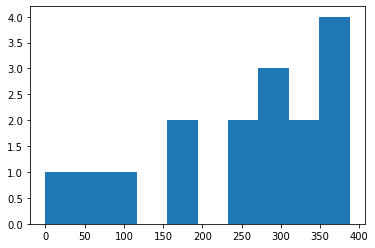

In [20]:
plt.hist(df_0['lab sum'])

Min grade: 194.0
N Total (post cut): 11
N Total (pre cut): (16,)
Mean: 329.1818181818182
Std: 47.97787024303863


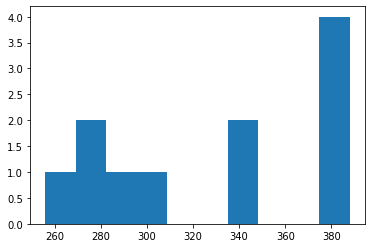

0.00 F: 0 0.00%
233.23 D: 3 27.27%
281.20 C: 2 18.18%
329.18 B: 3 27.27%
377.16 A: 3 27.27%


OrderedDict([('F', 0.0),
             ('D', 233.2260776957409),
             ('C', 281.20394793877955),
             ('B', 329.1818181818182),
             ('A', 377.1596884248568),
             ('A+', 388.0)])

In [21]:
compute_curve(df_0["lab sum"])

## Organizing Our Code

It is possible to perform the steps above without any (or with minimal) generalization or abstraction (ie using functions). We could work out a grade with a series of steps... then copy and paste for the other grades. The benefits would be that without generalization, we could fine tune every grade easily. But it could become tedious and our results would be error prone.

Alternatively, we can recognize that each of the steps above can be done with a set of functions that have the same inputs and outputs:

* Statistical Analysis Functions: Input list of grades. Output mean, standard deviation, and minium grade.
* Grade Boundries Functions: Input stats (and list of grades). Output boundries.
* Assign Grades Function: Input boundries and list grades. Output corresponding list of assigned letter grades.
* Validate Function: Input assigned letter grades, output percentage of each grade.

In addition, we will need to do a weighted sum of the grades to assign a class grade. 

We also have to note that beyond the procedural steps, we will have to make choices about how we represent the input/output data of each step. For example, previously we represented grade boundries as an `OrderedDict`. 



## Building a System

We are starting to recognize that depending on the context, we may choose different levels of sophistication for our code to solve a problem:

* Quickly solve a problem once: Cut and paste can be sufficient.
* Scale or solve the problem on many data points: Implement functions that perform tasks.
* Solve the same problem with different data: Identify tasks and generalize functions with defined input/outputs
* Enable others to use your code to solve the same problem.
* Build a production system or service that solves the problem.



## An Object Oriented Approach

Object Oriented programming is not required to solve problems. But in many cases, OO can greatly simplify the development process and ability to further add functionality to the code. Even within OO, there are many approaches to solving the same problem, and while some may have advatanges, often it takes several iterations and revisions to approach optimality... and even then, there are stylistic and historical choices.

Lets explore one OO approach to building a Grade Book system.


## Base Classes

In [22]:
# Create some virtual classes

class base:
    __name=""
    
    def __init__(self,name):
        self.__name=name

    def name(self):
        return self.__name
    

class data(base):
    def __init__(self,name):
        base.__init__(self,name)
        
class alg(base):
    def __init__(self,name):
        base.__init__(self,name)


In [23]:
a=alg("Hello")
a.name()

'Hello'

In [24]:
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base__name',
 'name']

## Grade Representation

We note that we have two types of grades: numerical and letter. We have a choice of how to represent grades. Below is one. What might be another way?

In [25]:
class grade(data):
    __letter_grades=["F-","F","F+","D-","D","D+","C-","C","C+","B-","B","B+","A-","A","A+"]
    
    def __init__(self,name,numerical=True,value=None):
        self.__value=value
        self.__numerical=numerical
        self.__gradebook_name=str()
        
        if value:
            if isinstance(value,(int,float)):
                self.__numerical=True
            elif isinstance(value,str):
                self.__numerical=False
            self.set(value)
        else:            
            self.__numerical=numerical
        self.__gradebook_name=name
        data.__init__(self,name+" Grade Data Object")        

    def set(self,value):
        if isinstance(value,(int,float)) and self.__numerical:
            self.__value=value
        elif isinstance(value,str) and not self.__numerical:
            if value in self.__letter_grades:
                self.__value=value
        else:
            print( self.name()+" Error: Bad Grade.")
            raise Exception
    
    def value(self):
        return self.__value
    
    def numerical(self):
        return self.__numerical
    
    def gradebook_name(self):
        return self.__gradebook_name
    
    def __str__(self):
        return self.__gradebook_name+": "+str(self.__value)


## Student Representation

In [26]:
class student(data):
    
    def __init__(self, first_name, last_name, id_number):
        self.__grades=dict()
        self.__id_number=id_number
        self.__first_name, self.__last_name = first_name, last_name
        data.__init__(self,first_name+" "+last_name+" Student Data")

    def add_grade(self,a_grade,overwrite=False):
        if overwrite or not a_grade.gradebook_name() in self.__grades:
            self.__grades[a_grade.gradebook_name()]=a_grade
        else:
            print (self.name()+" Error Adding Grade "+a_grade.name()+". Grade already exists.")
            raise Exception

    def id_number(self):
        return self.__id_number
    
    def __getitem__(self,key):
        return self.__grades[key]
    
    def print_grades(self):
        for grade in self.__grades:
            print (self.__grades[grade])

In [27]:
a_student=student("John","Doe",111)

a_student.add_grade(grade("Exam 1",value=95))
a_student.add_grade(grade("Exam 1 Letter",value="A"))

a_student.print_grades()

Exam 1: 95
Exam 1 Letter: A


## Grade Calculator

In [28]:
class grade_calculator(alg):    
    def __init__(self,name,stats):
        self.__stats=stats
        alg.__init__(self,name)

    def apply(self,a_grade):
        raise NotImplementedError
        

class uncurved_letter_grade_percent(grade_calculator):
    __grades_definition=[ (.97,"A+"),
                          (.93,"A"),
                          (.9,"A-"),
                          (.87,"B+"),
                          (.83,"B"),
                          (.8,"B-"),
                          (.77,"C+"),
                          (.73,"C"),
                          (.7,"C-"),
                          (.67,"C+"),
                          (.63,"C"),
                          (.6,"C-"),
                          (.57,"F+"),
                          (.53,"F"),
                          (0.,"F-")]
    __max_grade=100.
    __grade_name=str()
    
    def __init__(self,grade_name,max_grade=100.):
        self.__max_grade=max_grade
        self.__grade_name=grade_name
        grade_calculator.__init__(self,
                                  "Uncurved Percent Based Grade Calculator "+self.__grade_name+" Max="+str(self.__max_grade),
                                 False)
        

    def apply(self,a_grade):
        if not isinstance(a_grade,grade):
            print (self.name()+ " Error: Did not get an proper grade as input.")
            raise Exception
        if not a_grade.numerical():
            print (self.name()+ " Error: Did not get a numerical grade as input.")
            raise Exception

        percent=a_grade.value()/self.__max_grade
        
        for i,v in enumerate(self.__grades_definition):
            if percent>=v[0]:
                break
                            
        return grade(self.__grade_name,value=self.__grades_definition[i][1])
            

In [29]:
a_grader=uncurved_letter_grade_percent(grade_name="Exam 1 Test Grade")
print(a_grader.apply(a_student["Exam 1"]))

Exam 1 Test Grade: A


In [30]:
print(a_grader.apply(grade("Test Grade",value=81.)))

Exam 1 Test Grade: B-


In [31]:
class curved_letter_grade(grade_calculator):
    __grades_definition=[ (.97,"A+"),
                          (.93,"A"),
                          (.9,"A-"),
                          (.87,"B+"),
                          (.83,"B"),
                          (.8,"B-"),
                          (.77,"C+"),
                          (.73,"C"),
                          (.7,"C-"),
                          (.67,"C+"),
                          (.63,"C"),
                          (.6,"C-"),
                          (.57,"F+"),
                          (.53,"F"),
                          (0.,"F-")]
    __max_grade=100.
    __grade_name=str()
    
    def __init__(self,grade_name,mean,std,max_grade=100.):
        self.__max_grade=max_grade
        self.__mean=mean
        self.__std=std
        self.__grade_name=grade_name
        grade_calculator.__init__(self,
                                  "Curved Percent Based Grade Calculator "+self.__grade_name+ \
                                  " Mean="+str(self.__mean)+\
                                  " STD="+str(self.__std)+\
                                  " Max="+str(self.__max_grade),
                                   False)
        

    def apply(self,a_grade):
        if not isinstance(a_grade,grade):
            print (self.name()+ " Error: Did not get an proper grade as input.")
            raise Exception
        if not a_grade.numerical():
            print (self.name()+ " Error: Did not get a numerical grade as input.")
            raise Exception
    
        # Rescale the grade
        percent=a_grade.value()/self.__max_grade
        shift_to_zero=percent-(self.__mean/self.__max_grade)
        scale_std=0.1*shift_to_zero/(self.__std/self.__max_grade)
        scaled_percent=scale_std+0.8
        
        for i,v in enumerate(self.__grades_definition):
            if scaled_percent>=v[0]:
                break
                            
        return grade(self.__grade_name,value=self.__grades_definition[i][1])
            

In [32]:
a_student=student("John","Doe",111)

a_student.print_grades()

a_student.add_grade(grade("Exam 1",value=70))
a_student.add_grade(grade("Exam 1 Letter",value="A"))

a_student.print_grades()

Exam 1: 70
Exam 1 Letter: A


In [33]:
a_grader=curved_letter_grade(grade_name="Exam 1 Test Grade",mean=50.,std=10.)
print( a_grader.apply(a_student["Exam 1"]))

Exam 1 Test Grade: A+


In [34]:
print( a_grader.apply(grade("Test Grade",value=75.)))

Exam 1 Test Grade: A+


## Stats Computation

In [35]:
import numpy as np
import math

class statistics_calculator(alg):    
    def __init__(self,name):
        alg.__init__(self,name)

    def apply(self,grades):
        raise NotImplementedError
        
class mean_std_calculator(statistics_calculator):
    def __init__(self):
        statistics_calculator.__init__(self,"Mean and Standard Deviation Calculator")
        
    def apply(self,grades):
        return np.mean(grades),math.sqrt(np.var(grades))



## Grade Summing

In [36]:
class summary_calculator(alg):    
    def __init__(self,name):
        alg.__init__(self,name)

    def apply(self,a_student):
        raise NotImplementedError
        
class grade_summer(summary_calculator):
    def __init__(self,prefix,n):
        self.__prefix=prefix
        self.__n=n
        statistics_calculator.__init__(self,"Sum Grades")
        
    def apply(self,a_student):
        labels=[prefix+str(x) for x in range(1,n)]
        
        grade_sum=0.
        for label in labels:
            grade_sum+=a_student[label]
            
        a_student.add_grade(grade(prefix+"sum",value=grade_sum))

## Gradebook

In [37]:
class grade_book(data):
    
    def __init__(self,name):
        data.__init__(self,name+" Course Grade Book")
        self.__students=dict()
    
    def add_student(self,a_student):
        self.__students[a_student.id_number()]=a_student
        
    def assign_grade(self,key,a_grade):
        the_student=None
        try:
            the_student=self.__students[key]
        except:
            for id in self.__students:
                if key == self.__students[id].name():
                    the_student=self.__students[id]
                    break
        if the_student:
            the_student.add_grade(a_grade)
        else:
            print (self.name()+" Error: Did not find student.")
            
    def apply_grader(self,a_grader,grade_name):
        for k,a_student in self.__students.items():
            a_student.add_grade(a_grader.apply(a_student[grade_name]))
            
    def apply_stats(self,a_stat_comp,grade_name):
        grades=list()
        for k,a_student in self.__students.items():
            grades.append(a_student[grade_name].value())
            
        return a_stat_comp.apply(grades)
        
    def print(self):
        for id,student in self.__students.items():
            print("------------------------------------")
            print("Student:",id)
            print("------------------------------------")
            student.print_grades()
            
    

## Building a Gradebook

In [38]:
df_0.keys()

Index(['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4', 'Exam 1', 'Lab 5', 'Unnamed: 6',
       'Lab 7', 'Exam 2', 'Exam 1 Fixed', 'lab sum'],
      dtype='object')

In [39]:
a_grade_book=grade_book("Data 1401")

for student_i in range(df_0.shape[0]):
    a_student_0=student("Student",str(student_i),student_i)

    for k in df_0.keys():
        a_student_0.add_grade(grade(k,value=df_0[k].tolist()[student_i]))

    a_grade_book.add_student(a_student_0)
        

In [41]:
a_grade_book.apply_stats(mean_std_calculator(),"Exam 1 Fixed")

(67.9375, 30.906044615091073)

In [42]:
a_grade_book.apply_grader(curved_letter_grade("Exam 1 Letter Grade",68.,31.,max_grade=100.), "Exam 1 Fixed")

In [43]:
a_grade_book.print()

------------------------------------
Student: 0
------------------------------------
Lab 1: 0
Lab 2: 0
Lab 3: 0
Lab 4: 0
Exam 1: 0
Lab 5: 0.0
Unnamed: 6: 0.0
Lab 7: 0.0
Exam 2: 0.0
Exam 1 Fixed: 0
lab sum: 0.0
Exam 1 Letter Grade: F+
------------------------------------
Student: 1
------------------------------------
Lab 1: 100
Lab 2: 96
Lab 3: 46
Lab 4: 52.5
Exam 1: 68-sent
Lab 5: 0.0
Unnamed: 6: 0.0
Lab 7: 0.0
Exam 2: 0.0
Exam 1 Fixed: 68
lab sum: 294.5
Exam 1 Letter Grade: B-
------------------------------------
Student: 2
------------------------------------
Lab 1: 100
Lab 2: 100
Lab 3: 90
Lab 4: 56.5
Exam 1: 88-sent
Lab 5: 0.0
Unnamed: 6: 0.0
Lab 7: 0.0
Exam 2: 0.0
Exam 1 Fixed: 88
lab sum: 346.5
Exam 1 Letter Grade: B
------------------------------------
Student: 3
------------------------------------
Lab 1: 93
Lab 2: 100
Lab 3: 24
Lab 4: 53
Exam 1: 96-sent
Lab 5: 0.0
Unnamed: 6: 0.0
Lab 7: 0.0
Exam 2: 0.0
Exam 1 Fixed: 96
lab sum: 270.0
Exam 1 Letter Grade: B+
------------------